In [1]:
import os
import tensorflow as tf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

import gym
import numpy as np

from stable_baselines import DQN
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import MlpPolicy

from ads_utils import load_data, plot, Environment, write_to_logs, plot_k_timesteps
from tqdm import tqdm

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [3]:
EPOCHS = 5
INITIAL_BALANCE = 10_000
PAST_TICKS = 5
train_range = np.arange(1,13)
data = load_data(train_range)
env_test = Environment(data["close"].to_list(), balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)


model = DQN(MlpPolicy, env_test, verbose=1)

# sanity check for 100 timesteps
for i in range(EPOCHS):
    # model learn already implicitly calls env.reset
    model.learn(total_timesteps=100)

    if env_test.epoch_count >= EPOCHS:
        break
    print(f'epoch number {env_test.epoch_count}')
    

epoch number 1
epoch number 2
epoch number 3
epoch number 4


In [4]:
write_to_logs(env_test.logger, filename="demo_logs")

In [5]:
demo_logs = pd.read_csv("logs/demo_logs.csv")

In [6]:
demo_logs

,epoch,reward,portfolio,cumulative_tc,curr_step
0,1,-3.20412,9996.795880,1,112960
1,1,0.99000,9997.785880,1,112961
2,1,-3.08499,9994.700890,2,112962
3,1,-4.07500,9990.625890,3,112963
4,1,-0.01000,9990.615890,3,112964
...,...,...,...,...,...
495,5,2.25110,9945.404146,12,54971
496,5,-0.89170,9944.512446,12,54972
497,5,-2.11000,9942.402446,12,54973
498,5,1.37000,9943.772446,12,54974


### NOTE: Steps taken = curr_step - PAST_TICKS - 1

Text(0, 0.5, 'final portfolio value')

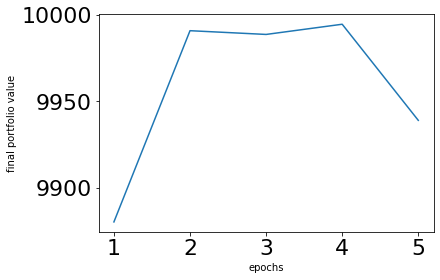

In [7]:
max_epoch = max(demo_logs.epoch)
epoch_demo_data = pd.DataFrame()
for i in range(1, max_epoch + 1):
    epoch_demo_data = epoch_demo_data.append(demo_logs[demo_logs.epoch==i][-1:])

plt.plot(np.arange(1, max_epoch + 1), epoch_demo_data.portfolio)
plt.xlabel("epochs")
plt.ylabel("final portfolio value")



## THE END hehehehe

In [8]:
# takes 1hr

INITIAL_BALANCE = 10_000
PAST_TICKS = 5
train_range = np.arange(1,13)
data = load_data(train_range)
env = Environment(data["close"].to_list(), balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)


model = DQN(MlpPolicy, env, verbose=1)

# # Train the agent
import time
start_time = time.time()
time_steps = 1_000_000
model.learn(total_timesteps=int(time_steps))
print(time.time() - start_time)








Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








3122.3437509536743


In [ ]:
write_to_logs(env.logger, filename="training_logs")


/Users/graceong/Applied-Data-Science/ads_utils.py:323: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df = pd.read_csv(logs)


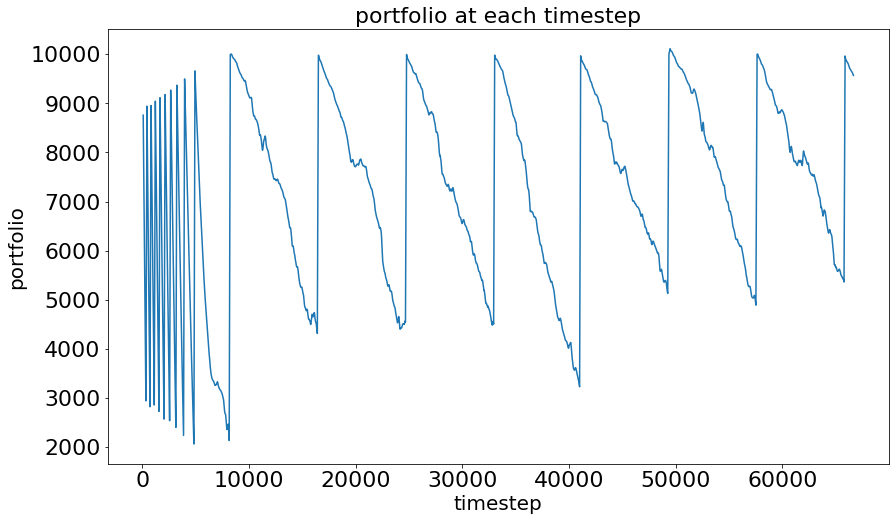

In [53]:
plot_k_timesteps(logs="training_logs", y_col="portfolio", window=100, k=15)

/Users/graceong/Applied-Data-Science/ads_utils.py:323: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df = pd.read_csv(logs)


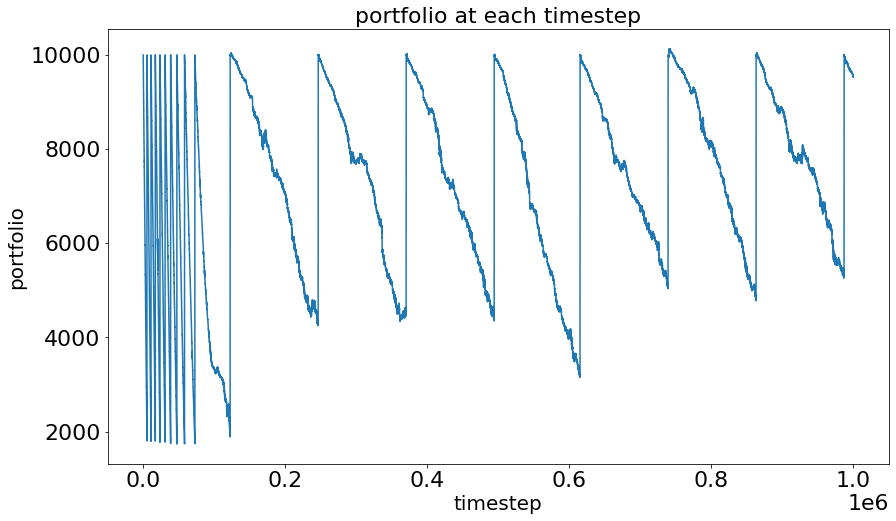

In [52]:
plot_k_timesteps(logs="training_logs", y_col="portfolio", window=1, k=1)

In [46]:
train_logs = pd.read_csv("training_logs")

max_epoch = max(train_logs.epoch)
epoch_data = pd.DataFrame()
for i in range(1, max_epoch + 1):
    epoch_data = epoch_data.append(train_logs[train_logs.epoch==i][-1:])

Text(0, 0.5, 'final portfolio value')

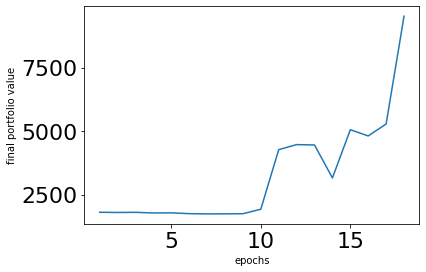

In [49]:
plt.plot(np.arange(1, max_epoch + 1), epoch_data.portfolio)
plt.xlabel("epochs")
plt.ylabel("final portfolio value")


In [50]:
val_logs = pd.read_csv("validation_logs")

max_epoch = max(val_logs.epoch)
epoch_val_data = pd.DataFrame()
for i in range(1, max_epoch + 1):
    epoch_val_data = epoch_val_data.append(val_logs[val_logs.epoch==i][-1:])

In [51]:
epoch_val_data

,epoch,reward,portfolio,cumulative_tc,curr_step
61159,1,-1.78275,9577.543576,57,61166


In [15]:
## save the model for my laptop's sake :P
model.save("deepq_firstrun")

In [14]:
len(data)

123933

In [12]:
len(val_data)

61167

hi!
hi!


/Users/graceong/Applied-Data-Science/ads_utils.py:323: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df = pd.read_csv(logs)


51.17675709724426


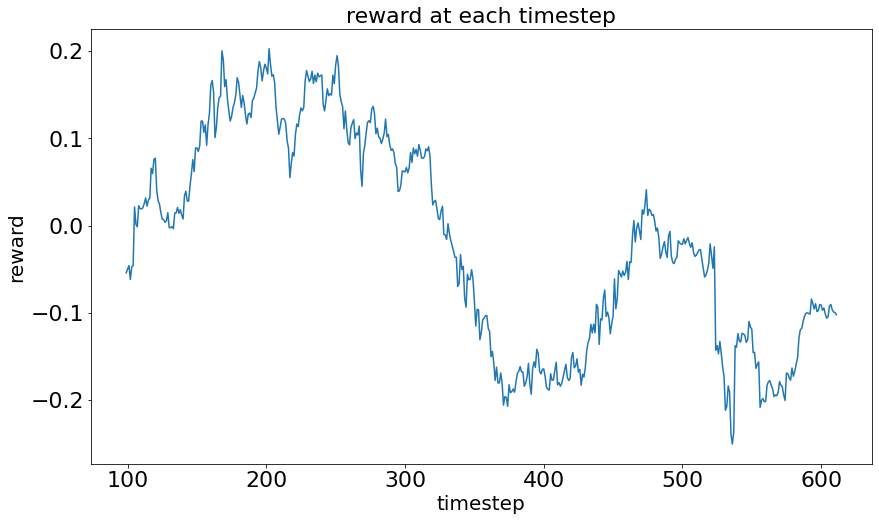

In [11]:
#validation 
start_time = time.time()
val_range = np.arange(13, 19)
val_data = load_data(val_range)
env_val = Environment(val_data["close"].to_list(), balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)
state = env_val.reset()
portfolio_values = []
prices = []
actions = []
for i in range(len(val_data)-PAST_TICKS - 2):
    action, _ = model.predict(state)

    price, portfolio_value = env_val.get_data()
    actions.append(action)
    prices.append(price)
    portfolio_values.append(portfolio_value)

    state, reward, done, env_logs = env_val.step(action)

    if done:
        print("hi!")
        state = env.reset()

logs = env_logs["logs"]
write_to_logs(logs, filename="validation_logs")
plot_k_timesteps(logs="validation_logs")
print(time.time() - start_time)


/Users/graceong/Applied-Data-Science/ads_utils.py:323: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df = pd.read_csv(logs)


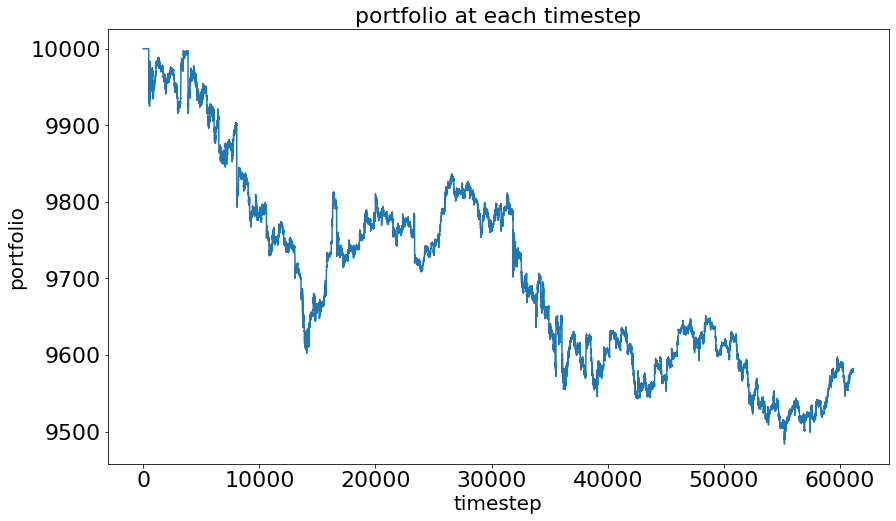

In [18]:
plot_k_timesteps(logs="validation_logs", k=1, window=1, y_col="portfolio")